In [1]:
# sympy está dando um aviso de código depreciado. Para fins de aprendizagem, estas linhas abaixo omitem os erros.
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import sympy

In [3]:
x = np.linspace(-5, 2, 100)
y1 = x ** 3 + 5 * x ** 2 + 10
y2 = 3 * x ** 2 + 10 * x
y3 = 6 * x + 10

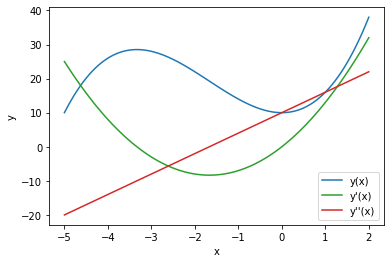

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="tab:blue", label="y(x)")
ax.plot(x, y2, color="tab:green", label="y'(x)")
ax.plot(x, y3, color="tab:red", label="y''(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [5]:
x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x ** 2)

Text(0, 0.5, 'y')

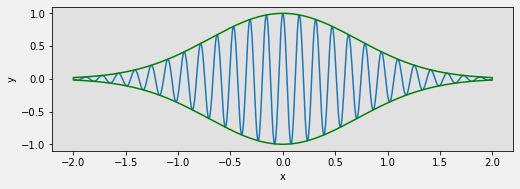

In [6]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")

# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

ax.plot(x, y1 * y2)
ax.plot(x, y2, "g")
ax.plot(x, -y2, "g")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [7]:
fig.savefig("created_files/graph.png", dpi=100, facecolor="#f1f1f1")

### Axes and subplots

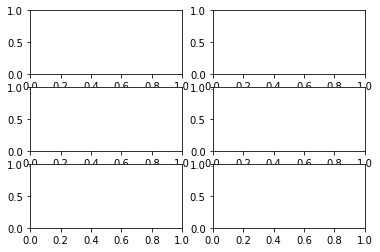

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2)

### Plot types

#### Lines

In [9]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x) # create a np array filled with ones, with the same shape and size as x

In [10]:
def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax + 1)
    ax.set_title(title)

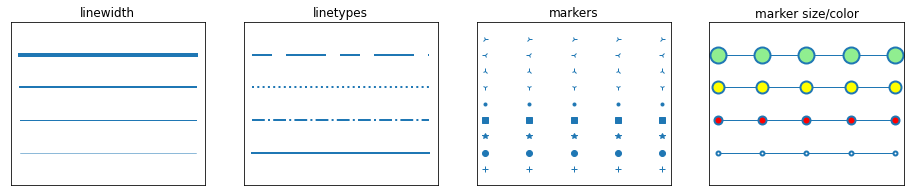

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(16, 3))

# Line width
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y + n, color="tab:blue", linewidth=linewidth)
axes_settings(fig, axes[0], "linewidth", len(linewidths))

# Line style
linestyles = ["-", "-.", ":"]
for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y + n, color="tab:blue", lw=2, linestyle=linestyle)
# Custom dash style
line, = axes[1].plot(x, y + 3, color="tab:blue", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "linetypes", len(linestyles) + 1)

# Marker type
markers = ["+", "o", "*", "s", ".", "1", "2", "3", "4"]
for n, marker in enumerate(markers):
    axes[2].plot(x, y + n, color="tab:blue", lw=2, ls=" ", marker=marker)
axes_settings(fig, axes[2], "markers", len(markers))

# Marker size and color
markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"), (16, "lightgreen")]
for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x, y + n, color="tab:blue", lw=1, ls="-", marker="o", markersize=markersize, markerfacecolor=markerfacecolor, markeredgewidth=2)
axes_settings(fig, axes[3], "marker size/color", len(markersizecolors))

### Line color variation

In [12]:
# A symbolic value of x, and a numerical array with specific values of x
sym_x = sympy.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n):
    """
    Evaluates the nth order Taylor series expansion of sin(x)
    for the numerical values in the array x
    """
    return sympy.lambdify(sym_x, sympy.sin(sym_x).series(n=n+1).removeO(), "numpy")(x)

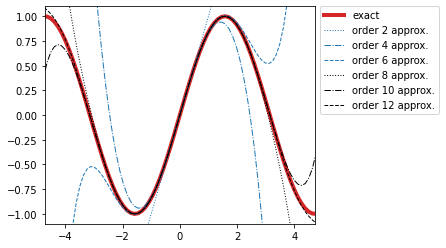

In [13]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), linewidth=4, color="tab:red", label="exact")

colors = ["tab:blue", "black"]
linestyles = [":", "-.", "--"]

for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
    linestyle=linestyles[idx % 3], linewidth=1,
    label=f"order {n+1} approx.")
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5 * np.pi, 1.5 * np.pi)

# Place a legend outside of the axes -- cool to learn
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
# Making room for the legend to the right of the axes
fig.subplots_adjust(right=.75)

In [14]:
x = np.linspace(0, 1, 100)
y1 = x
y2 = x + x ** 2

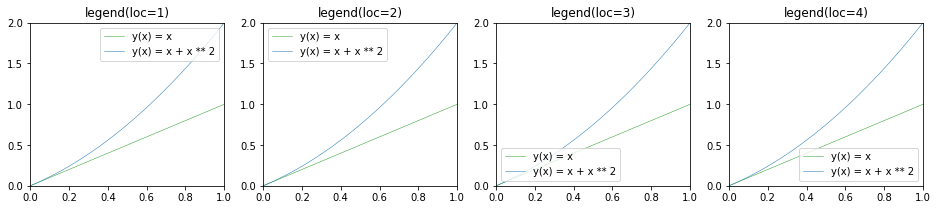

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(16, 3))
locations = [1, 2, 3, 4]

for idx, ax in enumerate(fig.axes):
    ax.plot(x, y1, color="tab:green", lw=0.5, label="y(x) = x")
    ax.plot(x, y2, color="tab:blue", lw=0.5, label="y(x) = x + x ** 2")
    ax.set_title(f"legend(loc={locations[idx]})")
    ax.legend(loc=locations[idx])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 2)
    ax.set_yticks(np.arange(0, 2.5, 0.5))

    

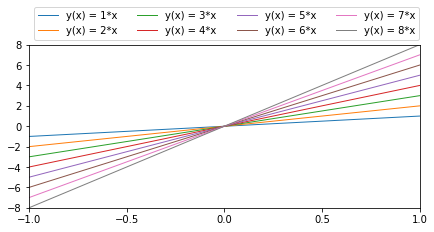

In [16]:
fig, ax = plt.subplots(figsize=(7, 3))

x = np.linspace(-1, 1, 100)
ys = [k*x for k in range(1, 9)]
for i, y in enumerate(ys):
    ax.plot(x, y, lw=1, label=f"y(x) = {i+1}*x")
ax.legend(ncol=4, loc=3, bbox_to_anchor=(0,1))
ax.set_xlim(-1, 1)
ax.set_ylim(-8, 8)
ax.set_xticks(np.arange(-1.0, 1.5, 0.5));

## Text Formatting and Annotations

Matplotlib uses an internal engine of LaTeX text, but it is possible to pass mpl.rcParams\["text.usetext"\] = True para utilizar engines externas. Verificar isso para engines com suporte a elementos e quações químicas.

Text(2, 0.1, 'Equation: $i\\hbar\\partial_t \\Psi = \\hat{H}\\Psi$')

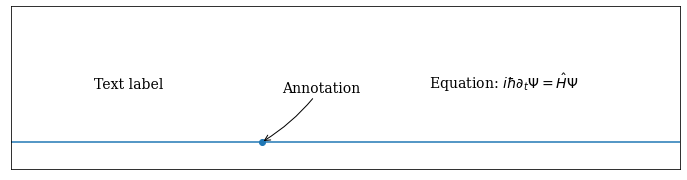

In [17]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

# text label
ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

# annotation
ax.plot(1, 0, "o")
ax.annotate("Annotation", fontsize=14, family="serif",
            xy=(1, 0), xycoords="data",
            xytext=(+20, +50), textcoords="offset points",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1"))

# equation
ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$",
                   fontsize=14, family="serif")

## Axis labels and Titles

Text(0.5, 1.0, 'axis labels and title example')

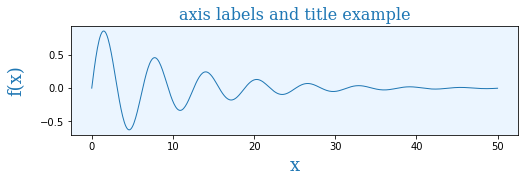

In [18]:
# set_xlabel
# set_ylabel
from sys import getsizeof
x = np.linspace(0, 50, 500)
y = np.sin(x) * np.exp(-x / 10)

fig, ax = plt.subplots(figsize=(8,2), subplot_kw={"facecolor":"#ebf5ff"})

ax.plot(x, y, lw=1)

ax.set_xlabel("x", labelpad=5, fontsize=18, fontname="serif", color="tab:blue")
ax.set_ylabel("f(x)", labelpad=15, fontsize=18, fontname="serif", color="tab:blue")
ax.set_title("axis labels and title example", fontsize=16, fontname="serif", color="tab:blue")

### Axis range

Text(0.5, 1.0, "axis('equal')")

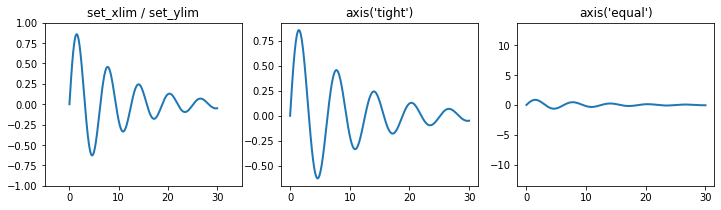

In [19]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)

fig, axes = plt.subplots(1, 3, figsize=(12,3))#, subplot_kw={"facecolor": "#ebf5ff"})

axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)
axes[0].set_ylim(-1, 1)
axes[0].set_title("set_xlim / set_ylim")

axes[1].plot(x, y, lw=2)
axes[1].axis("tight")
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis("equal")
axes[2].set_title("axis('equal')")




### Axis ticks, tick labels and grids

In [20]:
# mpl.ticker.MaxNLocator -> Set the maximum number ticks
# mpl.ticker.MultipleLocator set ticks at multiples of a giving base
# mpl.tickerFixedLocator explicitly specify the coordinate of a ticker

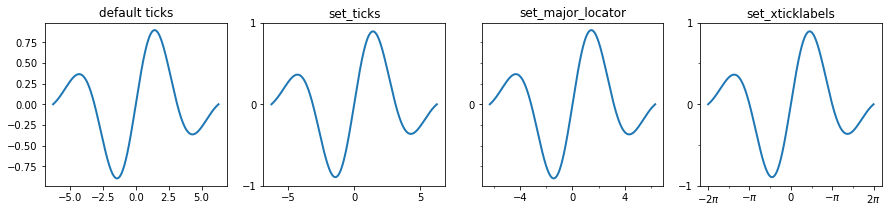

In [21]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x ** 2 / 20)

fig, axes = plt.subplots(1, 4, figsize=(15, 3))

axes[0].plot(x, y, lw=2)
axes[0].set_title("default ticks")

axes[1].plot(x, y, lw=2)
axes[1].set_title("set_ticks")
axes[1].set_yticks([-1, 0, 1])
axes[1].set_xticks([-5, 0, 5])

axes[2].plot(x, y, lw=2)
axes[2].set_title("set_major_locator")
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))

axes[3].plot(x, y, lw=2)
axes[3].set_title("set_xticklabels")
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[3].set_xticklabels([r"$-2\pi$", "$-\pi$", 0, "$-\pi$", "$2\pi$"])
x_minor_ticker = mpl.ticker.FixedLocator([-3 * np.pi / 2, -np.pi / 2, 0, np.pi / 2, 3 * np.pi / 2])
axes[3].xaxis.set_minor_locator(x_minor_ticker)
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))


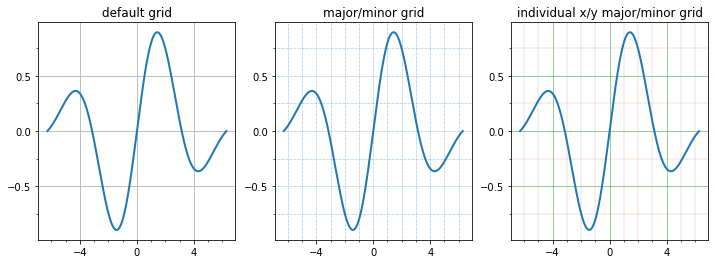

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

x_major_ticker = mpl.ticker.MultipleLocator(4)
x_minor_ticker = mpl.ticker.MultipleLocator(1)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)

axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="tab:blue", which="both", linestyle=":", lw=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="tab:green", which="major", axis="x", linestyle="-", lw=0.5)
axes[2].grid(color="tab:red", which="minor", axis="x", linestyle="-", lw=0.15)
axes[2].grid(color="tab:green", which="major", axis="y", linestyle="-", lw=0.5)
axes[2].grid(color="tab:red", which="minor", axis="y", linestyle="-", lw=0.15)


### Tick Labels

In [23]:
# mpl.ticker.ScalarFormater
# set_scientific_method
# set_powerlimits
# useMathText=True

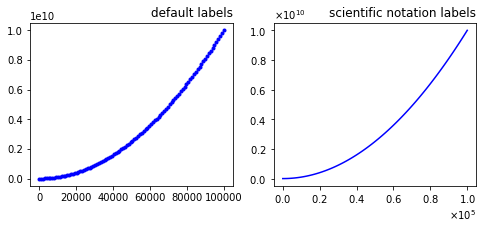

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(0, 1e5, 100)
y = x ** 2

axes[0].plot(x, y, "b.")
axes[0].set_title("default labels", loc="right")

axes[1].plot(x, y, 'b')
axes[1].set_title('scientific notation labels', loc='right')

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))

axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

### Log Plots

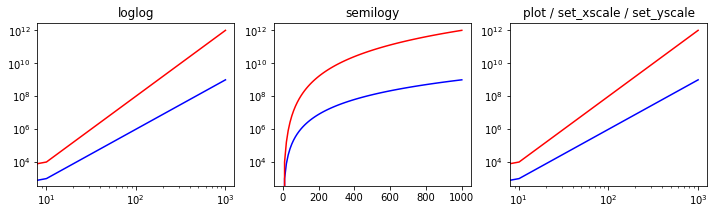

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

x = np.linspace(0, 1e3, 100)
y1, y2 = x**3, x**4

axes[0].set_title("loglog")
axes[0].loglog(x, y1, "b", x, y2, "r")


axes[1].set_title("semilogy")
axes[1].semilogy(x, y1, "b", x, y2, "r")

axes[2].set_title("plot / set_xscale / set_yscale")
axes[2].plot(x, y1, "b", x, y2, "r")
axes[2].set_xscale("log")
axes[2].set_yscale("log")


### Twin Axes using both sides as an axis

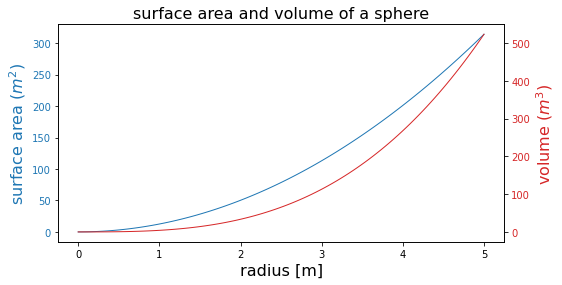

In [26]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2 # area
v = (4 * np.pi / 3) * r ** 3 # volume

ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius [m]", fontsize=16)

ax1.plot(r, a, lw=1, color="tab:blue")
ax1.set_ylabel(r"surface area ($m^2$)", fontsize=16, color="tab:blue")
for label in ax1.get_yticklabels():
    label.set_color("tab:blue")
    
ax2 = ax1.twinx()
ax2.plot(r, v, lw=1, color="tab:red")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=16, color="tab:red")
for label in ax2.get_yticklabels():
    label.set_color("tab:red")

### Spines

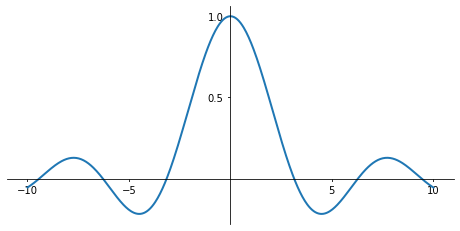

In [27]:
x = np.linspace(-10, 10, 500)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, lw=2)

# remove top and right spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# remove top and right spine ticks
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

# move bottom and left spine to x=0 and y=0
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))

ax.set_xticks([-10, -5, 5, 10])
ax.set_yticks([0.5, 1])

# give each label a solid background of white, to not overlap with the plot line

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_bbox({"facecolor":"white","edgecolor":"white"})

### Insets and new subplots

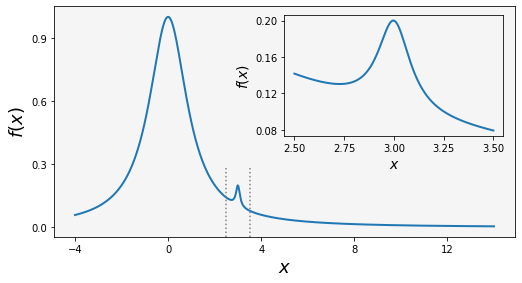

In [28]:
fig = plt.figure(figsize=(8,4))

def f(x):
    return 1 / (1 + x**2) + 0.1 / (1 + ((3 - x) / 0.1) ** 2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), lw=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    
# main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

# inset
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax_insert = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor="none")
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax_insert, x, f, 14)

### Subplots mpl.pyplot.subplots(nrows, ncols...)

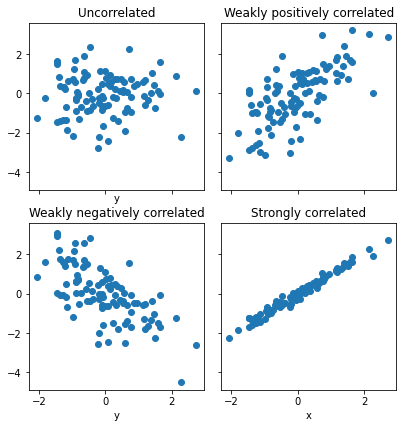

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True, squeeze=False)

x1 = np.random.randn(100)
x2 = np.random.randn(100)

axes[0, 0].set_title("Uncorrelated")
axes[0, 0].scatter(x1, x2)

axes[0, 1].set_title("Weakly positively correlated")
axes[0, 1].scatter(x1, x1 + x2)

axes[1, 0].set_title("Weakly negatively correlated")
axes[1, 0].scatter(x1, -x1 + x2)

axes[1, 1].set_title("Strongly correlated")
axes[1, 1].scatter(x1, x1 + 0.15 * x2)

axes[1, 1].set_xlabel("x")
axes[1, 0].set_xlabel("x")
axes[0, 0].set_xlabel("y")
axes[1, 0].set_xlabel("y")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1, hspace=0.2)

### Subplot2grid

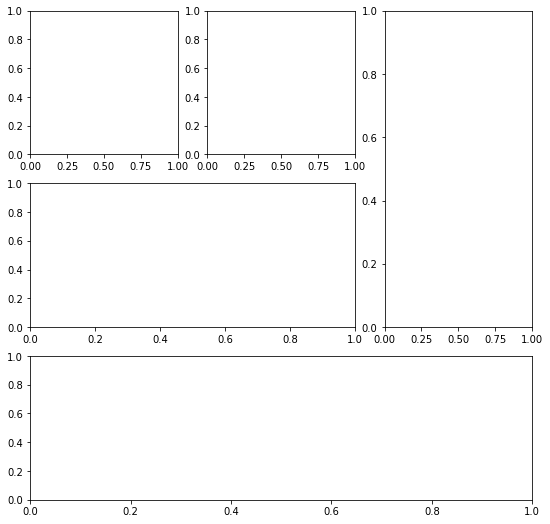

In [30]:
fig = plt.figure(figsize=(9, 9))

ax0 = plt.subplot2grid((3, 3), (0,0))
ax1 = plt.subplot2grid((3, 3), (0,1))
ax2 = plt.subplot2grid((3, 3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (2,0), colspan=3)
ax4 = plt.subplot2grid((3, 3), (0,2), rowspan=2)


### Gridspec

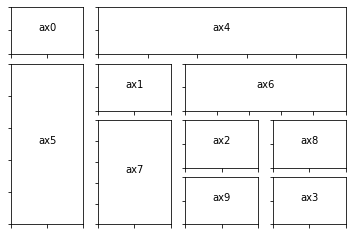

In [31]:
fig = plt.figure(figsize=(6, 4))
gs = mpl.gridspec.GridSpec(4, 4)

def clear_ticks(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 2])
ax3 = fig.add_subplot(gs[3, 3])
ax4 = fig.add_subplot(gs[0, 1:])
ax5 = fig.add_subplot(gs[1:, 0])
ax6 = fig.add_subplot(gs[1, 2:])
ax7 = fig.add_subplot(gs[2:, 1])
ax8 = fig.add_subplot(gs[2, 3])
ax9 = fig.add_subplot(gs[3, 2])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
[ax.text(0.5, 0.5, f"ax{n}", horizontalalignment="center") for n, ax in enumerate(axes)]
[clear_ticks(ax) for ax in axes];

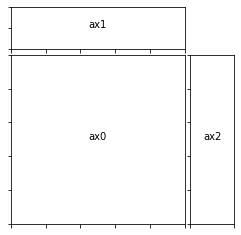

In [32]:
fig = plt.figure(figsize=(4, 4))
gs = mpl.gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.05, hspace=0.05)
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 1])

axes = [ax0, ax1, ax2]
[ax.text(0.5, 0.5, f"ax{n}", horizontalalignment="center") for n, ax in enumerate(axes)]
[clear_ticks(ax) for ax in axes];

### Colormap plots
#### Continuar na página 174

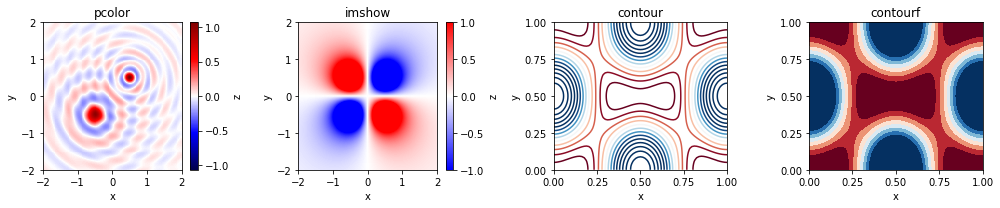

In [62]:
# copied and pasted from book github page
x = y = np.linspace(-2, 2, 150)
X, Y = np.meshgrid(x, y)

R1 = np.sqrt((X+0.5)**2 + (Y+0.5)**2)
R2 = np.sqrt((X+0.5)**2 + (Y-0.5)**2)
R3 = np.sqrt((X-0.5)**2 + (Y+0.5)**2)
R4 = np.sqrt((X-0.5)**2 + (Y-0.5)**2)

fig, axes = plt.subplots(1, 4, figsize=(14, 3))

Z = np.sin(10 * R1) / (10 * R1) + np.sin(20 * R4) / (20 * R4)


p = axes[0].pcolor(X, Y, Z, cmap='seismic', vmin=-abs(Z).max(), vmax=abs(Z).max())
axes[0].axis('tight')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title("pcolor")
axes[0].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[0].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))


cb = fig.colorbar(p, ax=axes[0])
cb.set_label("z")
cb.set_ticks([-1, -.5, 0, .5, 1])


Z = 1/R1 - 1/R2 - 1/R3 + 1/R4

im = axes[1].imshow(Z, vmin=-1, vmax=1, cmap=mpl.cm.bwr,
               extent=[x.min(), x.max(), y.min(), y.max()])
im.set_interpolation('bilinear')

axes[1].axis('tight')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title("imshow")
cb = fig.colorbar(im, ax=axes[1])

axes[1].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
#cb.ax.set_axes_locator(mpl.ticker.MaxNLocator(4))
cb.set_label("z")
cb.set_ticks([-1, -.5, 0, .5, 1])

x = y = np.linspace(0, 1, 75)
X, Y = np.meshgrid(x, y)
Z = - 2 * np.cos(2 * np.pi * X) * np.cos(2 * np.pi * Y) - 0.7 * np.cos(np.pi - 4*np.pi*X)

c = axes[2].contour(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

axes[2].axis('tight')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title("contour")

axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))


c = axes[3].contourf(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

axes[3].axis('tight')
axes[3].set_xlabel('x')
axes[3].set_ylabel('y')
axes[3].set_title("contourf")

axes[3].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[3].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

fig.tight_layout()

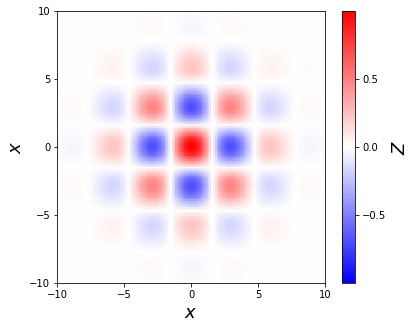

In [72]:
x = y = np.linspace(-10, 10, 150)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.cos(Y) * np.exp(-(X/5) ** 2 - (Y/5) ** 2)

fig, ax = plt.subplots(figsize=(6, 5))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
p = ax.pcolor(X, Y, Z, norm=norm, cmap=mpl.cm.bwr)

ax.axis("tight")
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p, ax=ax)
cb.set_label(r"$Z$", fontsize=18)
cb.set_ticks([-1, -.5, 0, .5, 1])

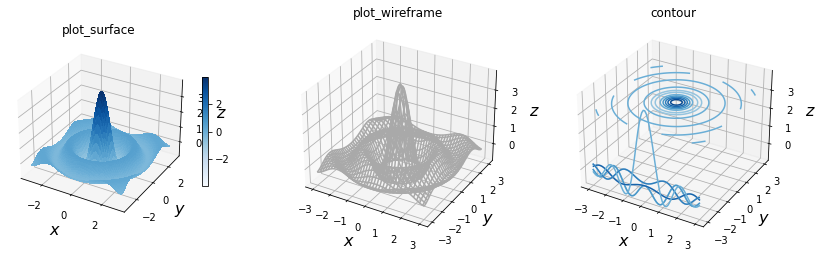

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={"projection":"3d"})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel(r"$x$", fontsize=16)
    ax.set_ylabel(r"$y$", fontsize=16)
    ax.set_zlabel(r"$z$", fontsize=16)

x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(4 * R) / R

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1,
                        linewidth=0, antialiased=False, norm=norm,
                        cmap=mpl.cm.Blues)

cb = fig.colorbar(p, ax=axes[0], shrink=0.5)
title_and_labels(axes[0], "plot_surface")

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

cset = axes[2].contour(X, Y, Z, zdir="z", offset=3, norm=norm,
                       cmap=mpl.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir="y", offset=-3, norm=norm,
                       cmap=mpl.cm.Blues)
title_and_labels(axes[2], "contour")
